# SC2001 Project 1 (Lab Group A33, Group 1)
## Integration of Mergesort & Insertion Sort


> In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. <br><br>
> Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.


In [36]:
# Imports
import time
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed to ensure that our data does not change in the future.
np.random.seed(22)

### a) Algorithm Implementation

> Implement the above hybrid algorithm.

In [3]:
# Create an Object to store the Number of Key Comparisons in our Sorting Methods
class KeyComparisons:
    def __init__(self):
        self.numKeyComparisons = 0

    def isALargerThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a > b

    def isALessThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a < b

    def isAEqualB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a == b

    def incrementKeyComparisons(self, incrementValue):
        self.numKeyComparisons += incrementValue

    def resetKeyComparisons(self):
        self.numKeyComparisons = 0
        
    def returnKeyComparisons(self):
        return self.numKeyComparisons
        

# Declaring a Constant for Fixed Threshold Value
def FIXED_THRESHOLD_VALUE():
    return 10

### Insertion Sort

In [4]:
def insertionSort(arr, comparisonsObject):
    
    # Traverse for each element from index 1 to end of list. First element can be ignored.
    for i in range(1, len(arr)):
        key = arr[i] # Pick out the element at the i-th position
        j = i-1 # j will be the running index for all the elements before elem
        
        while j >= 0 and comparisonsObject.isALessThanB(key, arr[j]): # While it hasn't reached the first element and the key is smaller than the previous elements, we will shift the j-th element to the j+1-th position
            arr[j+1] = arr[j]
            j -= 1
           
        arr[j+1] = key # If we reach an element that is smaller than the key or the start of the list (j=-1), we will insert the key to the right of that element or at index 0 if it reached start of list.
    return arr

### Merge Sort

In [33]:
def mergeSort(arr, comparisonsObject, criterion):
    # Use the middle element to divide the array into two halves
    m = len(arr)//2

    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    if len(arr) > criterion:
        # Sort first half recursively
        arr[:m] = mergeSort(arr[:m], comparisonsObject, criterion)
        # Sort second half recursively
        arr[m:] = mergeSort(arr[m:], comparisonsObject, criterion)
    arr = merge(arr[:m], arr[m:], comparisonsObject)
    
    return arr

### Hybrid Sort

In [6]:
# Merge function which will be used in the hybrid sort when merge sort is chosen over insertion sort.

def merge(arr1, arr2, comparisonsObject):
    # initialise indices for each array
    i = 0
    j = 0
    
    # initialise final sorted array
    sorted_arr = []
    
    # While both halves are not empty, we compare the 1st elements of the 2 lists
    while i != len(arr1) and j != len(arr2):
        # Keeping track of the Number of Comparisons

        # if first element of 1st list is smaller, 1st element of first half joins the end of the merged list
        if comparisonsObject.isALessThanB(arr1[i], arr2[j]):
            sorted_arr.append(arr1[i])
            i += 1
        # else if 1st element of 2nd list is smaller, move the 1st element of 2nd half to the end of the merged list
        elif arr2[j] < arr1[i]:
            sorted_arr.append(arr2[j])
            j += 1
        # else if they are equal, move both the 1st element of the first list and the second list to the merged list
        else:
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
    # if first list still has elements, copy all the elements in the first list to the merged list
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    # if second list still has elements, copy all the elements in the second list to the merged list
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr

In [7]:
# Hybrid Sort takes in parameters of an array and array size limit S.
# If array size is <= S, insertion sort will be used 
# If array size is > S , merge sort will be used instead

def hybridSort(arr,S, comparisonsObject):
    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    
    # Merge Sort 
    if len(arr) > S:
        # Use the middle element to divide the array into two halves
        m = len(arr)//2
        
        # Sort first half recursively
        arr[:m] = hybridSort(arr[:m],S, comparisonsObject)
        # Sort second half recursively
        arr[m:] = hybridSort(arr[m:], S, comparisonsObject)
        arr = merge(arr[:m], arr[m:], comparisonsObject)
        return arr
    
    # Insertion Sort
    else:
        arr = insertionSort(arr, comparisonsObject)
        return arr

### Testing the sorting algorithms


In [37]:
arr = [4,2,10,100,3,59,43,-1,-8,0,7,12,11,3,3,3]
comparisonsObject = KeyComparisons()   

print(hybridSort(arr,3, comparisonsObject))

[-8, -1, 0, 2, 3, 3, 3, 3, 4, 7, 10, 11, 12, 43, 59, 100]


## b) Generate input data

> Generate arrays of increasing sizes, in a range from
1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [38]:
# Generate the required sizes of the arrays programatically from the range of 1,000 to 10 million.

inputDataSizes = []

for i in range(10):
    inputDataSizes.append((i+1) * 1000)
    inputDataSizes.append((i+1) * 10000)
    inputDataSizes.append((i+1) * 100000)
    inputDataSizes.append((i+1) * 1000000)

# Remove duplicates and sort the input data sizes
inputDataSizes = sorted(set(inputDataSizes))
print(inputDataSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [39]:
# List of List of data
inputData = []

# Iterate through the data sizes array
for s in inputDataSizes:
    # For each datasize, we generate a random data array of size (s), each array will contain random integers from 1 to s.
    data = np.random.randint(1,s+1,size = s)
    inputData.append(data)
    
# Checking for the array of size 1000 that the generation was done correctly.    
for i in range(len(inputData)):
    print("Array Size: ", len(inputData[i]))
    print("Min of this array:" , min(inputData[i]))
    print("Max of this array:" , max(inputData[i]))
    print()

Array Size:  1000
Min of this array: 1
Max of this array: 1000

Array Size:  2000
Min of this array: 3
Max of this array: 2000

Array Size:  3000
Min of this array: 2
Max of this array: 2998

Array Size:  4000
Min of this array: 2
Max of this array: 4000

Array Size:  5000
Min of this array: 2
Max of this array: 5000

Array Size:  6000
Min of this array: 1
Max of this array: 6000

Array Size:  7000
Min of this array: 1
Max of this array: 7000

Array Size:  8000
Min of this array: 1
Max of this array: 8000

Array Size:  9000
Min of this array: 3
Max of this array: 8999

Array Size:  10000
Min of this array: 1
Max of this array: 10000

Array Size:  20000
Min of this array: 1
Max of this array: 20000

Array Size:  30000
Min of this array: 2
Max of this array: 29999

Array Size:  40000
Min of this array: 1
Max of this array: 40000

Array Size:  50000
Min of this array: 3
Max of this array: 50000

Array Size:  60000
Min of this array: 1
Max of this array: 59999

Array Size:  70000
Min of th

In [40]:
# Verifying that the arrays were created correctly
print(inputData[0])

[ 886  133  813  961  357  359  503  492  597  905  480  485  990  659
  527  765  558  473   94  936  291  938  896    9  681  134  368  540
  597  675  542  723   82  295  634  916  788  707  988    8  668  872
  536  239  280  874  652  479  398   53  972  629  360  560  766  626
  642  432  728   84  827  762   61  561  606  956  990  322  606  662
  621   54  394  506  341  146  821  388  628  613  396  414  765   97
  211  964  391  848  445  157  929 1000  858  694   81  470  601  463
  530  446  905  409  404  235  319  619  226  518  967  878  518  839
  314  191   70  215  257  998  575  434  978  915  730  106   97   64
  180  982  712  215  290  461  681  725  761  506  185  656  534  470
  454  773  581   84  705  896  393  491  885  529  290  278  711  377
  547  807  678  743  299   71  923  248  696  461  613   94  725  704
  383  524  956  617  994  227  655  292  423  577   20   10  708  176
  827   71  250  791  989  233  808  130  532  988  936  786  242  631
  835 

## c) Analyse Time Complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

> ### c)i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

### Theoretical Analysis of the time complexity

Using the hybrid algorithm, we perform Insertion Sort when the size of the n/s (n elements / s threshold size) array is below a threshold s. Then, we are performing Insertion Sort on arrays, where each array is size s.

We know the average and worst-case time complexity of Insertion Sort is *O(s2)*. Thus, the total time complexity of the Insertion Sort component of our hybrid algorithm is:

    n/s x *O(s2)* 
    = O(ns)*

If we consider the best-case, then the total time complexity will be:

    n/s x *O(s)* 
    = *O(n)*

Next, performing the Merge operation on the sorted arrays. In traditional Merge Sort, this Merge operation is done on log n levels. However, since we switched to Insertion Sort wherein the array size is fixed at s, the Merge operation is only called on log (n/s) levels.

Each level compares n elements. Therefore, the total time complexity of the Merge Sort component of our hybrid algorithm is:
    
    n x log (n/s) = *O(n log (n/s))*

Hence, the total time complexity of the hybrid algorithm is:

    At worst and average-case: *O(ns + n log (n/s))*

    At best-case: *O(n + n log (n/s))*

Compare with Empirical Data
    When s is fixed, the time complexity of the hybrid algorithm can be simplified to *O(n + n log n)* = *O(n log n) , so long as s* does not approach n.

Since we set our s to be very small (9), we expect our time complexity to be: 

     *O(n log n)*.

We note that the hybrid algorithm does more key comparisons than the merge sort algorithm. This is to be expected since the hybrid algorithm incorporated the Insertion Sort algorithm, whose runtime is *O(n2)* => more key comparisons than *O(n log n)*.

We note that the hybrid algorithm has a lower elapsed time than the merge sort algorithm. This is also to be expected since the small sub-arrays are sorted more quickly using Insertion Sort, resulting in lesser elapsed time.

### Empirical Results

In [16]:
# Fix the Threshold Value S
thresholdValueS = FIXED_THRESHOLD_VALUE()

# Create Arrays to store X and Y Coordinates
fixedThresholdXCoordinates = []
fixedThresholdYCoordinates = []
fixedThresholdTimeCoordinates = []

# Run Hybrid Sort over each Individual Array
for array in inputData:
    copyOfArray = copy.deepcopy(array)
    arrayLength = len(copyOfArray)
    print("Current Array Size: {}".format(arrayLength))
    
    # Create Timestamps to track the time taken for the Hybrid Sort to sort this Array
    startTimestamp = time.time()
    hybridSort(copyOfArray, thresholdValueS, comparisonsObject)
    endingTimestamp = time.time()

    # Record the KeyComparisons (Y) and Different Threshold Values S(X)
    numKeyComparisons1 = comparisonsObject.returnKeyComparisons()
    fixedThresholdXCoordinates.append(arrayLength)
    fixedThresholdYCoordinates.append(numKeyComparisons1)
    fixedThresholdTimeCoordinates.append(endingTimestamp - startTimestamp)

    # Print Time Taken & Num Key Comparisons
    print("Time Elapsed for Hybrid Sort: {0:.4f} seconds".format(endingTimestamp - startTimestamp))
    print("Number of Key Comparisons: {}".format(numKeyComparisons1))
    print()
    # Reset the Number of Key Comparisons for Next Array
    comparisonsObject.resetKeyComparisons()



Current Array Size: 1000
Time Elapsed for Hybrid Sort: 0.0050 seconds
Number of Key Comparisons: 2145462

Current Array Size: 2000
Time Elapsed for Hybrid Sort: 0.0110 seconds
Number of Key Comparisons: 19517

Current Array Size: 3000
Time Elapsed for Hybrid Sort: 0.0191 seconds
Number of Key Comparisons: 30386

Current Array Size: 4000
Time Elapsed for Hybrid Sort: 0.0257 seconds
Number of Key Comparisons: 43080

Current Array Size: 5000
Time Elapsed for Hybrid Sort: 0.0340 seconds
Number of Key Comparisons: 56566

Current Array Size: 6000
Time Elapsed for Hybrid Sort: 0.0419 seconds
Number of Key Comparisons: 66799

Current Array Size: 7000
Time Elapsed for Hybrid Sort: 0.0548 seconds
Number of Key Comparisons: 80063

Current Array Size: 8000
Time Elapsed for Hybrid Sort: 0.0568 seconds
Number of Key Comparisons: 94045

Current Array Size: 9000
Time Elapsed for Hybrid Sort: 0.0649 seconds
Number of Key Comparisons: 108492

Current Array Size: 10000
Time Elapsed for Hybrid Sort: 0.087

Text(0.5, 1.0, 'Graph of number of Key Comparisons against different Input List Sizes N')

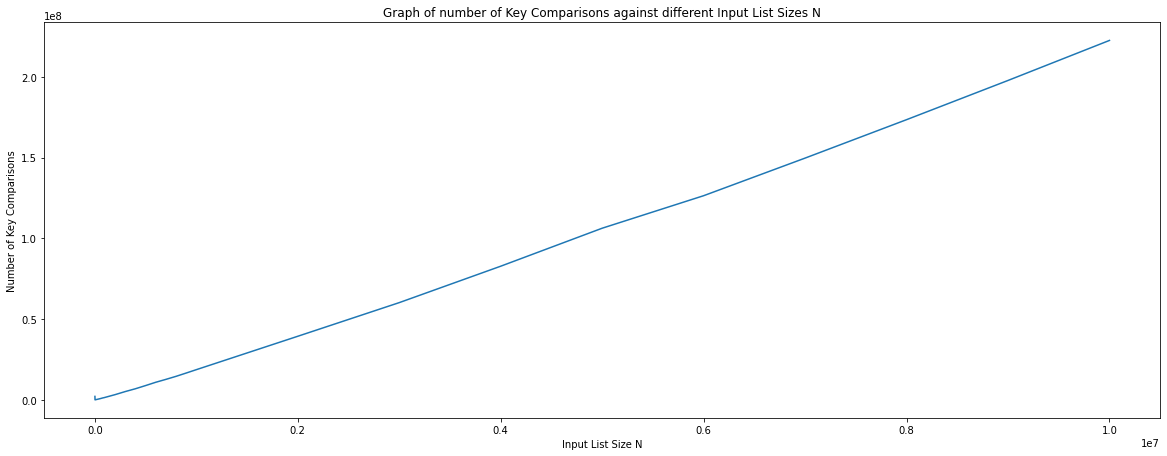

In [26]:
## Plot the Graph using Matplotlib
# Plot the Points
f = plt.figure(figsize = (20,16))
ax = f.add_subplot(211)
ax.plot(fixedThresholdXCoordinates, fixedThresholdYCoordinates)

# Naming the Axes
ax.set_xlabel("Input List Size N")
ax.set_ylabel("Number of Key Comparisons")
ax.set_title("Graph of number of Key Comparisons against different Input List Sizes N")

Text(0.5, 1.0, 'Graph of number of Key Comparisons against different Input List Sizes N')

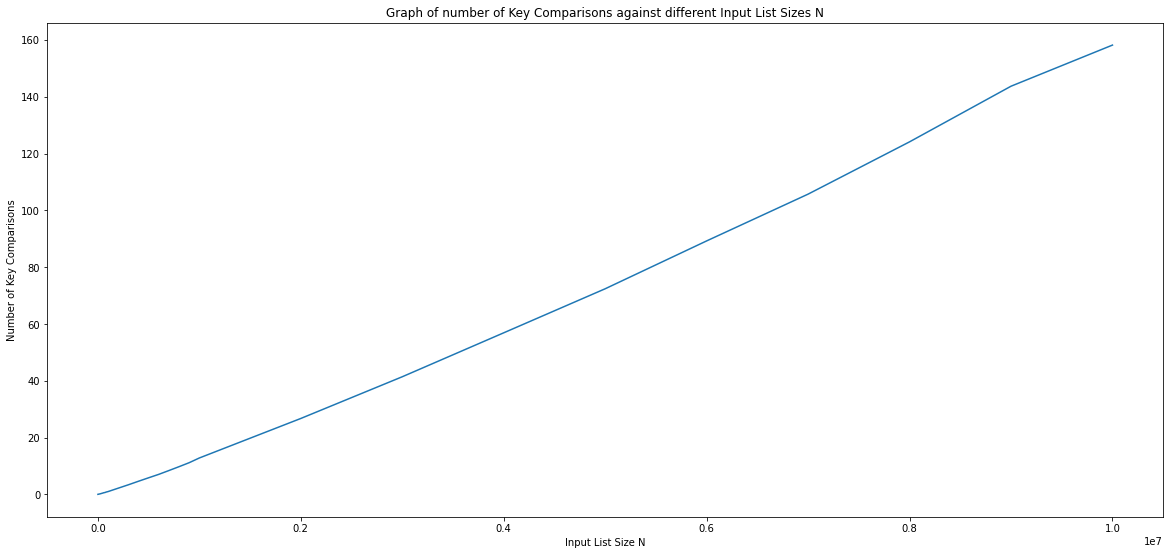

In [22]:
## Plot the Graph using Matplotlib
# Plot the Points
f = plt.figure(figsize = (20,20))
ax = f.add_subplot(211)
ax.plot(fixedThresholdXCoordinates, fixedThresholdTimeCoordinates)

# Naming the Axes
ax.set_xlabel("Input List Size N")
ax.set_ylabel("Number of Key Comparisons")
ax.set_title("Graph of number of Key Comparisons against different Input List Sizes N")

> ### c) ii) With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity. 

### Theoretical Analysis of the time complexity

The plot of number of key comparisons against the threshold size presents a staircase pattern. This can be explained as follows:

Consider an array of size n, and set the threshold to be s = n/k. The following binary tree structure illustrates the top-down approach of mergesort method.

![Illustration.png](attachment:Illustration.png)

When the mergesort method splits the array into k n/k-sized subarrays, the Insertion Sort method will only be called when the array size is ≤ s.

Now suppose we change the value of s to be such that 2n/k < s < n/k. Notice that since subarray of size 2n/k is bigger than s, the Merge Sort algorithm will be called on the level of array size 2n/k instead. The Insertion Sort algorithm will only be called on the level of array size n/k.

Now suppose we change the value of s to be 2n/k. Then, the Insertion Sort algorithm will be invoked on the level of array size 2n/k instead.

This shows that whenever the value of s is strictly between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort method called is the same => the number of key comparisons is the same.

This explains the staircase pattern shown in the plot, where the leveled region is when 2n/k ≤ s ≤ n/k and the spike region is when s = 2n/k or s = n/k.


### Empirical Results

In [42]:
def determineOptimalThreshold(initialThreshold, selectedArray, potentialThresholdValueArray, potentialThresholdTimesArray, fixedArraySizeXCoordinates, fixedArraySizeYCoordinates, inputData):
    # Array to store the Time Elapsed for each Threshold Value
    thresholdArray = []

    # Run Hybrid Sort after changing threshold value
    numThresholdValues = len(inputData)
    thresholdValueS = initialThreshold

    for i in range(numThresholdValues):
        # Create a Copy of Array
        copiedArray = copy.deepcopy(selectedArray)
        # Increment to change the thresholdValueS
        thresholdValueS += 5
        print("Current Threshold Value: {}".format(thresholdValueS))
        
        # Track the Time Elapsed for Hybrid Sort
        start = time.time()
        hybridSort(copiedArray, thresholdValueS, comparisonsObject)
        end = time.time()

        # Record the KeyComparisons (Y) and Different Threshold Values S(X)
        numKeyComparisons2 = comparisonsObject.returnKeyComparisons()
        fixedArraySizeXCoordinates.append(thresholdValueS)
        fixedArraySizeYCoordinates.append(numKeyComparisons2)
        
        # Show Time Elapsed & Num Key Comparisons
        timeElapsed1 = end - start
        thresholdArray.append(timeElapsed1)
        print("Time Elapsed: {0:.4f} seconds".format(timeElapsed1))
        print("Number of Key Comparisons: {}".format(numKeyComparisons2))
        comparisonsObject.resetKeyComparisons()

    # Determine the Optimal Threshold
    minTimeElapsed1 = min(thresholdArray)
    indexOfOptimalThreshold = thresholdArray.index(minTimeElapsed1)
    optimalThreshold = initialThreshold + (indexOfOptimalThreshold+1)*10
    
    # Append to List and Print Optimal Results
    potentialThresholdTimesArray.append(minTimeElapsed1)
    potentialThresholdValueArray.append(optimalThreshold)
    print("Optimal Threshold: {}".format(optimalThreshold))
    print("Time Taken for Optimal Threshold: {0:.4f}".format(minTimeElapsed1))
    print()
# Choose an Array to fix the Array Size
selectedArray = inputData[4]
# selectedArray = np.random.randint(1,300+1,size = 300)
print("This is Array Length: {}".format(len(selectedArray)))
# Array to store the list of potential optimal threshold values and their minimum times
testArray1 = []
testArray2 = []

# Create Arrays to store X and Y Coordinates
fixedArraySizeXCoordinates = []
fixedArraySizeYCoordinates = []

determineOptimalThreshold(0, selectedArray, testArray1, testArray2, fixedArraySizeXCoordinates, fixedArraySizeYCoordinates, inputData)


This is Array Length: 5000
Current Threshold Value: 5
Time Elapsed: 0.0359 seconds
Number of Key Comparisons: 53916
Current Threshold Value: 10
Time Elapsed: 0.0329 seconds
Number of Key Comparisons: 56658
Current Threshold Value: 15
Time Elapsed: 0.0339 seconds
Number of Key Comparisons: 56658
Current Threshold Value: 20
Time Elapsed: 0.0382 seconds
Number of Key Comparisons: 65322
Current Threshold Value: 25
Time Elapsed: 0.0419 seconds
Number of Key Comparisons: 65322
Current Threshold Value: 30
Time Elapsed: 0.0369 seconds
Number of Key Comparisons: 65322
Current Threshold Value: 35
Time Elapsed: 0.0359 seconds
Number of Key Comparisons: 65322
Current Threshold Value: 40
Time Elapsed: 0.0468 seconds
Number of Key Comparisons: 85274
Current Threshold Value: 45
Time Elapsed: 0.0449 seconds
Number of Key Comparisons: 85274
Current Threshold Value: 50
Time Elapsed: 0.0429 seconds
Number of Key Comparisons: 85274
Current Threshold Value: 55
Time Elapsed: 0.0439 seconds
Number of Key Com

Text(0.5, 1.0, 'Graph of number of Key Comparisons over different Threshold Values S')

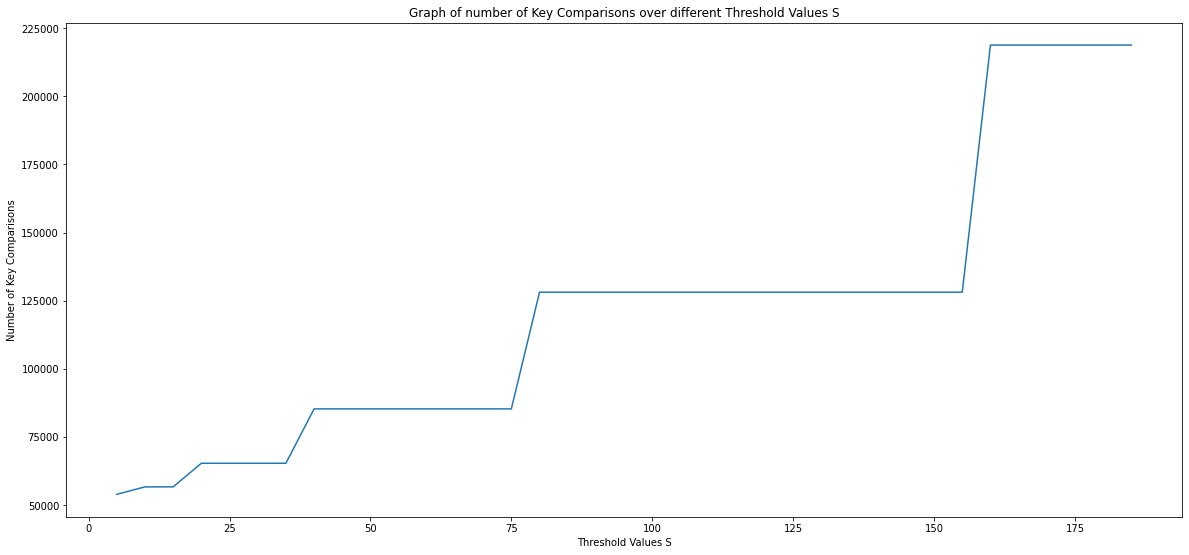

In [46]:
## Plot the Graph using Matplotlib
# Plot the Points
f = plt.figure(figsize = (20,20))
ax = f.add_subplot(211)
ax.plot(fixedArraySizeXCoordinates, fixedArraySizeYCoordinates)

# Naming the Axes
ax.set_xlabel("Threshold Values S")
ax.set_ylabel("Number of Key Comparisons")
ax.set_title("Graph of number of Key Comparisons over different Threshold Values S")

> ### c) iii) Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

Optimal S is: 9


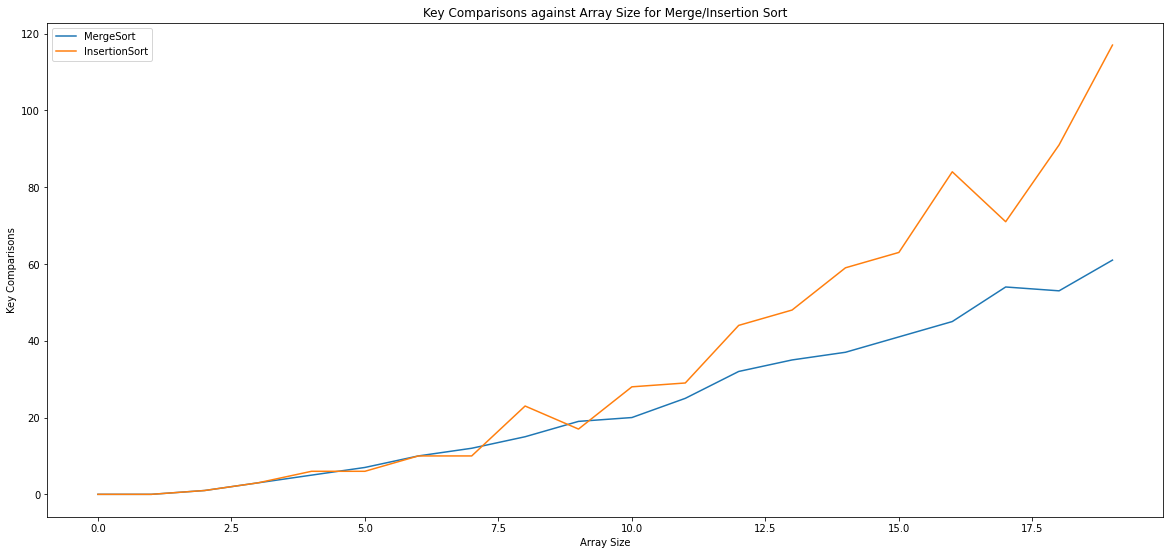

In [35]:
optimalS = 0
arraySize = range(0,20)
mergeComparisons = []
insertionComparisons = []
mergeComparison = 0
mergeObject = KeyComparisons()
insertObject = KeyComparisons()

for s in arraySize:
    arr = np.random.randint(10000,size = s)
    arr2 = arr.copy()
    arr = mergeSort(arr, mergeObject, 2)
    mergeComparison = mergeObject.returnKeyComparisons()
    mergeObject.resetKeyComparisons()
    
    arr2 = insertionSort(arr2, insertObject)
    insertionComparison = insertObject.returnKeyComparisons()
    insertObject.resetKeyComparisons()
    
    if insertionComparison < mergeComparison:
        optimalS = s
    mergeComparisons.append(mergeComparison)
    insertionComparisons.append(insertionComparison)
    

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arraySize,mergeComparisons, label="MergeSort") 
ax.plot(arraySize, insertionComparisons, label = "InsertionSort")
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size for Merge/Insertion Sort")
ax.legend()

print('Optimal S is:', optimalS)

> ### d) Compare with Original Mergesort: Implement the original mergesort. Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. Use the optimal value of S obtained in (c) for this task

In [47]:
def mergeSort(arr, comparisonsObject, criterion):
    # Use the middle element to divide the array into two halves
    m = len(arr)//2

    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    if len(arr) > criterion:
        # Sort first half recursively
        arr[:m] = mergeSort(arr[:m], comparisonsObject, criterion)
        # Sort second half recursively
        arr[m:] = mergeSort(arr[m:], comparisonsObject, criterion)
    arr = merge(arr[:m], arr[m:], comparisonsObject)
    
    return arr

# Initial Initialisation
targetArray = copy.deepcopy(inputData[36])
compareMergeAndHybrid = KeyComparisons()

# Determine Merge Sort CPU Times & Key Comparisons
mergeSortStartTime = time.time()
mergeSort(targetArray, compareMergeAndHybrid, 2)    # Don't think Optimal Threshold applies to MergeSort as well
mergeSortEndTime = time.time()

mergeSortTimeTaken = mergeSortEndTime - mergeSortStartTime
print("Merge Sort CPU Times: {0:.2f} seconds".format(mergeSortTimeTaken))
print("Number of Key Comparisons for Merge Sort: {}".format(compareMergeAndHybrid.returnKeyComparisons()))

# Reinitialise Arrays and Objects
targetArray = copy.deepcopy(inputData[36])
compareMergeAndHybrid.resetKeyComparisons()

# Determine the Same for Hybrid Sort
hybridSortStartTime = time.time()
hybridSort(targetArray, 9, compareMergeAndHybrid)
hybridSortEndTime = time.time()

hybridSortTimeTaken = hybridSortEndTime - hybridSortStartTime
print("Hybrid Sort CPU Times: {0:.2f} seconds".format(hybridSortTimeTaken))
print("Number of Key Comparisons for Hybrid Sort: {}".format(compareMergeAndHybrid.returnKeyComparisons()))


Merge Sort CPU Times: 168.73 seconds
Number of Key Comparisons for Merge Sort: 216318223
Hybrid Sort CPU Times: 157.79 seconds
Number of Key Comparisons for Hybrid Sort: 219370301


> In conclusion, Hybrid Sort is more efficient as it has a shorter running time, despite having more key comparisons. The higher number of key comparisons is due to hybrid sort utilising insertion sort when N is small. Insertion sort will have a higher number of key comparisons than Merge Sort, hence the total amount of key comparisons for Hybrid Sort will be higher.